# 1. Request_Library

## 크롤링의 원리
- 절차는 빅픽처에서 보면 아래와 같다.

1. 정보를 가져올 사이트를 불러온다.
2. 원하는 정보와 해당 정보의 위치를 찾는다.
3. 정보를 가져오게 하는 코드를 작성한다.

### Request - Success
- 브라우저 역할을 대신 해준다.

In [1]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs

In [2]:
res_google = req.get('https://www.google.com')

In [5]:
res_google
# response 200은 성공적으로 response 데이터 받아온 status code

# response[200] -> 통신 성공
# response[400] -> 클라이언트의 요청의 문제
# response[500] -> 서버의 문제

<Response [200]>

In [6]:
res_google.text
# html 문서 형식이 아닌 파이썬 형식의 텍스트 데이터

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Wppc6nWcmDPPuBecHWev_A">(function(){window.google={kEI:\'VQhPZO7uCMqhoATM-pTwAg\',kEXPI:\'0,1359409,6059,206,4804,2316,383,246,5,1129120,1197717,677,380097,16114,28684,22431,1361,12314,17585,4998,13228,3847,38444,885,1987,2891,8348,3406,606,50058,10631,2615,3783,117,9242,3,576,20583,4,1528,2304,42126,13659,4437,16786,5827,2530,4094,7596,1,42154,2,14022,25739,6700,951,30170,4568,6253,23424,1252,5835,14967,4333,19,7465,445,2,2,1,24626,2006,8155,7321,60,15969,874,7829,11804,7,1922,9779,36154,6305,2007,18192,17623,2513,14,82,2730,17476,8377,18960,5403,3030,6110,5041,4665,1804,10472,2885,19740,2171,24,3585,1643,1405,2130,1330,1697,476,1159,7948,5739,1299,5899,1791,328,258,256,102,1112,1967,749,2608,3050,163,91,

### Request - Failed

In [7]:
res_melon = req.get('https://www.melon.com')
res_melon
# 클라이언트 에러 발생
# 404 : 클라이언트가 요청한 리소스를 서버에서 찾을 수 없을 경우
# 406 : = 요청한 리소스를 서버에서 제공할 수 없는 형식으로 요청한 경우

<Response [406]>

In [8]:
# user_agent 
    # Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36
    
    # dict 형태로 맞춰줘야 한다.

head = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
res_melon
# 클라이언트 에러 발생
# 404 : 클라이언트가 요청한 리소스를 서버에서 찾을 수 없을 경우
# 406 : = 요청한 리소스를 서버에서 제공할 수 없는 형식으로 요청한 경우

In [9]:
# Response header: 위치 또는 서버 자체에 대한 정보(이름, 버전 등)와 
# 같이 응답에 대한 부가적인 정보를 갖는 헤더
res_melon = req.get('https://www.melon.com', headers = head)
res_melon

<Response [200]>

In [10]:
res_melon.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 

--------------------------

# 2. BeautifulSoup Library
- html 문서 내 데이터에 접근할 수 있도록 변환해주는 라이브러리

In [13]:
import requests as req

res_google = req.get("https://www.google.com")
res_google.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="x3S1sz7cc2cr7RUtzVeE6A">(function(){window.google={kEI:\'YhRPZLyUFb_L2roPoq63mAw\',kEXPI:\'0,1359409,1710,4348,207,4804,2316,383,246,5,1129120,1197745,656,380090,16114,28684,22431,1361,283,12037,2815,1930,12834,4998,13228,3847,3599,34845,885,1987,2891,8348,3406,606,29842,28444,2404,15756,3,576,20583,4,1528,2304,42126,13659,4437,16786,5824,2533,4094,7596,1,42154,2,14022,25739,5679,1021,31122,4567,6259,23418,1252,5835,14967,4333,19,7465,445,2,2,1,24626,2006,8155,7381,15970,872,7829,11805,7,1922,9780,5863,30290,2524,3781,2007,18192,20136,14,82,2730,17476,8377,8051,10909,3890,1513,2265,765,5630,480,3226,6480,1804,10472,1853,1032,2711,6769,4256,6004,5780,1643,1405,2130,3014,13,477,775,383,5798,2,2147,1760,2708,

In [16]:
from bs4 import BeautifulSoup as bs

## 파싱 (Parsing)이란?
- 웹페이지에서 원하는 데이터를 추출, 가공하기 쉬운 형태로 변환하는 것.

In [18]:
bs_google = bs(res_google.text, 'lxml')
bs_google

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="x3S1sz7cc2cr7RUtzVeE6A">(function(){window.google={kEI:'YhRPZLyUFb_L2roPoq63mAw',kEXPI:'0,1359409,1710,4348,207,4804,2316,383,246,5,1129120,1197745,656,380090,16114,28684,22431,1361,283,12037,2815,1930,12834,4998,13228,3847,3599,34845,885,1987,2891,8348,3406,606,29842,28444,2404,15756,3,576,20583,4,1528,2304,42126,13659,4437,16786,5824,2533,4094,7596,1,42154,2,14022,25739,5679,1021,31122,4567,6259,23418,1252,5835,14967,4333,19,7465,445,2,2,1,24626,2006,8155,7381,15970,872,7829,11805,7,1922,9780,5863,30290,2524,3781,2007,18192,20136,14,82,2730,17476,8377,8051,10909,3890,1513,2265,765,5630,480,3226,6480,1804,10472,1853,1032,2711,6769,4256,6004,5780,1643,1405,2130,3014,13,477,775,383,5798,2,2147,1760,2708,2

In [21]:
# 자료 유형 알아보기
print(type(res_google))
print(type(bs_google))

# bs로 객체화 진행됨

<class 'requests.models.Response'>
<class 'bs4.BeautifulSoup'>


### Practice 1
- Google Tab에서 'Google'의 text 데이터를 가져오자

In [24]:
soup = bs_google.select_one('title')
soup

<title>Google</title>

In [25]:
soup.text

'Google'

### 실습
- youtube에 접속해서
- youtube의 tab을, 그리고 텍스트 형식으로 가져오기

In [34]:
res_youtube = req.get('https://www.youtube.com')
title = bs(res_youtube.text, 'lxml').select_one('title').text
title

'YouTube'

#### Parser 별 비교
- https://dalgonakit.tistory.com/193

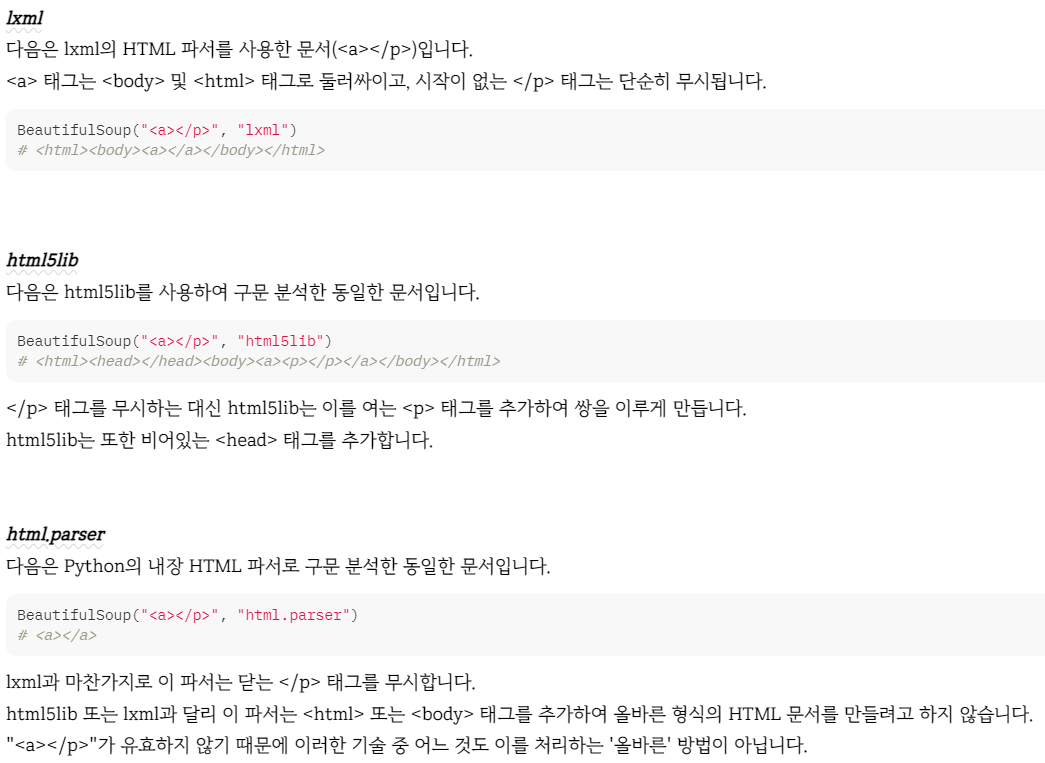

----------------------

## 3_Beautifulsoup_Practice1_NAVER
- Naver Menu들에서 '메일' 텍스트를 추출

#### css selector 종류
1. tag selector -> select('태그이름')
2. id selector -> select('#id')
3. class selector -> select('.class')
4. child selector -> select('>')
5. parent selector -> select('&')
6. adjacent selector -> select('+')
7. General Sibling -> select('~')

In [66]:
res_naver = req.get('https://www.naver.com')
naver_menu_mail = bs(res_naver.text, 'lxml').select('a.nav')[0].text
naver_menu_mail

'메일'

In [68]:
nav_naver = bs(res_naver.text, 'lxml').select('a.nav')

for i in range(len(nav_naver)):
    print(nav_naver[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


### NAVER 날씨에서 온도 데이터 수집

In [81]:
res_weather = req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%98%A4%EB%8A%98%EC%9D%98+%EB%82%A0%EC%94%A8')
bs_weather = bs(res_weather.text, 'lxml')
today_temp = bs_weather.select('div.temperature_text > strong')[0].text
today_temp

'현재 온도17.4°'

### NAVER NEWS 기사제목 가져오기

In [93]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81'

res_news = req.get(url)
naver_news = bs(res_news.text, 'lxml').select('a.news_tit')[0].text
naver_news

'KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파'

### 기사들을 뽑아오기

In [94]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81'

res_news = req.get(url)
naver_news = bs(res_news.text, 'lxml').select('a.news_tit')

for i in range(len(naver_news)):
    print(naver_news[i].text)

KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파
교황 "우크라 전쟁 종식 위한 비밀 임무 수행 중"
우크라전 장기화에… 2023년 1분기 러시아인 난민 신청 건수 1위
유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"
“북한, 러시아 용병 회사에 포탄 1만발 제공 예정”
우크라 대반격 임박...러시아 대규모 방어망 구축
KT, 러시아 IDC법인 철수…"우크라이나 전쟁 탓"
시진핑은 왜 우크라이나 젤렌스키와 통화했을까
러시아, 유류시설 공격 인정…"봄철 대반격의 서막"
[단독] 현대차, '脫 러시아' 계획 수립…현대모비스·위아는 '부품 공급' 유지...


### 개인 실습

1. 네이버 창에 원하는 키워드 검색
2. 뉴스 탭으로 이동
3. beautifulsoup으로 요소들을 뽑아보고
4. 그 중 기사 하나를 추출

In [101]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=nba'
res_news = req.get(url)
bs_news = bs(res_news.text, 'lxml').select('a.news_tit')

news_list = []

for i in range(len(bs_news)):
    news_list.append(bs_news[i].text)
    
print(news_list[2])

NBA 슈퍼스타 커리와 르브론, 5년 만에 PO에서 격돌


### 4.Beautifulsoup_Practice2_Melonchart

In [15]:
import pandas as pd

url = 'https://www.melon.com/chart/index.htm'
head = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

res_melon = req.get(url, headers = head)
bs_melon = bs(res_melon.text, 'lxml')

In [21]:
title = pd.Series([i.text for i in bs_melon.select('div.ellipsis.rank01 > span > a')])
artist = pd.Series([i.text for i in bs_melon.select('div.ellipsis.rank02 > span > a')])

dt = pd.concat([title, artist], axis=1, keys = ['title', 'artist'])
dt

,title,artist
0,I AM,IVE (아이브)
1,Kitsch,IVE (아이브)
2,꽃,지수 (JISOO)
3,손오공,세븐틴 (SEVENTEEN)
4,파이팅 해야지 (Feat. 이영지),부석순 (SEVENTEEN)
...,...,...
98,빙글빙글 (Prod. R.Tee),김호중
99,결국엔 너에게 닿아서,Charlie Puth
100,NaN,폴킴
101,NaN,헤이즈 (Heize)


In [9]:
dt.to_csv('melon.csv', encoding='euc-kr', index=False)

In [ ]:
i = 1
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=nba&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=29&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=' + str(i)
    
            

In [64]:
def crawl(i):
    info, title, txt = [], [], []
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=nba&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=29&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=' + str(i)
    res_url = req.get(url)
    bs_url = bs(res_url.text, 'lxml')

    title_lst = bs_url.select('a.news_tit')
    info_lst = bs_url.select('a.info.press')
    txt_lst = bs_url.select('a.api_txt_lines.dsc_txt_wrap')

    for i in range(len(title_lst)):
        info.append(info_lst[i].text)
        title.append(title_lst[i].text)
        txt.append(txt_lst[i].text)

    df = pd.concat([pd.Series(info), pd.Series(title), pd.Series(txt)], axis=1, keys=['info', 'title', 'txt'])

    return df

i = 1

for _ in range(10):
    if i == 1:
        df = crawl(i)
        i += 10
        
    else:
        temp = crawl(i)
        df = pd.concat([df, temp], axis=0)
        i += 10

In [65]:
df.reset_index(inplace=True, drop=True)
df

,info,title,txt
0,서울경제,NBA PO 8강서 커리-제임스 빅뱅[사진],골든스테이트의 스테픈 커리가 1일 새크라멘토 골든1 센터에서 열린 미국프로농구(NB...
1,연합뉴스,"NBA 서부 1위 덴버, PO 2라운드서 피닉스에 기선제압…머리 34점",미국프로농구(NBA) 덴버 너기츠가 플레이오프(PO) 2라운드에서 피닉스 선스를 1...
2,스포츠서울,"NBA 슈퍼스타 커리와 르브론, 5년 만에 PO에서 격돌",디펜딩 NBA 챔피언 골든스테이트 워리어스 스테펀 커리가 1일 새크라멘토 킹스와의 ...
3,연합뉴스,14위까지 쳐졌던 레이커스의 반등…NBA 서부 PO 2회전 진출,미국프로농구(NBA) 서부 콘퍼런스 15팀 중 14위까지 떨어졌던 로스앤젤레스(LA...
4,시선뉴스,[10년 전 오늘] NBA 콜린스 커밍아웃 美 현역선수 처음... 스포츠계 발칵,10년 전 오늘인 2013년 5월 1일에는 미국프로농구(NBA) 제이슨 콜린스가 미...
...,...,...,...
95,스포츠경향,"‘새크라멘토 호재’ 팍스, GSW와의 5차전 “100% 출전”[NBA]",손가락을 다친 디애런 팍스(25)가 강력히 골든스테이트 워리어스와의 5차전 출전 의...
96,스포츠경향,"‘괴인&투석기’ 밀워키, 패배에도 한 줄기 희망 챙겼다[NBA]",밀워키 벅스(이하 밀워키)가 야니스 아데토쿤보(28·그리스)와 브룩 로페즈(35)의...
97,MK스포츠,"‘커리 36점’ GSW, 새크라멘토에 반격 [NBA PO]",미국프로농구(NBA) 플레이오프에서 골든스테이트 워리어스가 반격에 나섰다. 골든스테...
98,점프볼,"“커리, 몸 푸는 것부터 인상적” 우지원-이승준, NBA 직관 썰 풀었다",NBA 최고의 스타인 스테픈 커리(골든스테이트)의 경기도 직접 지켜보며 NBA의 묘...
